## 实验介绍

### 1.实验内容

本实验包括: 
* 理解聚类的概念，掌握常见聚类算法。
* 基于层次聚类算法，在Iris数据集上实现聚类。

### 2.实验环境

* python 3.6.7
* numpy 1.13.3
* pandas 0.23.4   

### 3.数据介绍

* 数据保存在文件Iris.csv中，数据集内包含 3 类共 150 条记录，每类各50个数据，每条记录都有4项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

### 4.实验准备

点击屏幕右上方的下载实验数据模块，选择下载Iris.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf ./work/iris.tgz -C ./dataset/

x ./iris.csv


## 正式实验

### 1. 导入所需要的包

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

### 2. 读取数据

In [2]:
iris_df = pd.read_csv('./dataset/iris.csv')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 创建一个LabelEncoder对象
le = LabelEncoder()

# 将最后一列编码为数字
iris_df.iloc[:, -1] = le.fit_transform(iris_df.iloc[:, -1])

iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
X = iris_df.iloc[:, :-1].values.astype(float)
y = iris_df.iloc[:, -1].values

### 3. AGNES聚类算法

In [6]:
# 欧氏距离
def elu_distance(a, b):
    dist = np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))
    return dist

# 计算集合Ci, Cj间最小距离并返回
def dist_min(ci, cj):
    return min(elu_distance(i, j) for i in ci for j in cj)

# 计算集合Ci, Cj间最大距离并返回
def dist_max(ci, cj):
    # 计算簇Ci, Cj间最大距离
    return max(elu_distance(i, j) for i in ci for j in cj)

# 计算集合Ci, Cj间平均距离并返回
def dist_avg(ci, cj):
    # 计算簇Ci, Cj间平均距离
    return sum(elu_distance(i, j) for i in ci for j in cj) / (len(ci) * len(cj))

# 找出距离最小的两个簇并返回
def find_index(m):
    min_dist = float('inf')
    x = y = 0
    for i in range(len(m)):
        for j in range(len(m[i])):
            if i != j and m[i][j] < min_dist:
                min_dist, x, y = m[i][j], i, j
    return x, y, min_dist


![](https://jaggar-oss.oss-cn-shanghai.aliyuncs.com/img/20230514165919.png)

In [7]:
############################################################
# AGNES算法："自底向上"聚合策略的层次聚类算法
# 1、将数据集中的每一个样本作为一个初始聚类簇
# 2、找出距离最近的两个聚类簇进行合并
# 3、不断重复步骤2，直至达到预设的聚类簇个数
############################################################

def agnes(dataset, dist, k):
    # 初始化聚类簇及距离矩阵
    c, m = [], []
    # 将数据集中的每一个样本作为一个初始聚类簇
    for item in dataset:
        ci = []
        ci.append(item)
        c.append(ci)
    # 基于某种集合间距离计算方式计算簇类间距离
    for i in c:
        mi = []
        for j in c:
            mi.append(dist(i, j))
        m.append(mi)
    q = len(dataset)

    # “自底向上”聚合
    while q > k:
        # 找出距离最近的两个聚类簇进行合并
        x, y, min_dist = find_index(m)
        # 注意extend与append的区别
        c[x].extend(c[y])
        # 更新聚类簇
        c.remove(c[y])
        # 重新计算聚类簇间距离
        m = []
        for i in c:
            mi = []
            for j in c:
                mi.append(dist(i, j))
            m.append(mi)
        q -= 1
    return c

In [8]:
def show_cluster(cluster):
    # 展示聚类结果
    colors = ['or', 'ob', 'og', 'ok', 'oy', 'ow']
    for i in range(len(cluster)):
        for item in cluster[i]:
            plt.plot(item[0], item[1], colors[i])
    plt.title("AGNES Clustering")
    plt.show()

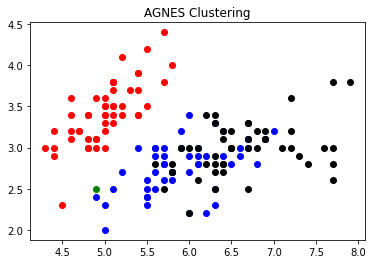

In [9]:
k = 4
cluster = agnes(iris_df.values.tolist(), dist_avg, k)
show_cluster(cluster)